In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
df.shape

(2035, 8)

In [4]:
df = df[::-1]
df = df.reset_index(drop=True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [5]:
open_price = df.iloc[:,1:2]
train_set = open_price[:2000].values
test_set = open_price[2000:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (2000, 1)
Test size: (35, 1)


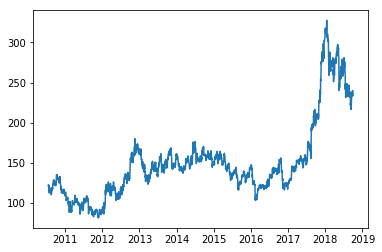

In [7]:
dates = pd.to_datetime(df['Date'])
plt.plot_date(dates, open_price,fmt='-')
plt.savefig("test1final.png")

In [8]:
train_set.shape

(2000, 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)

In [12]:
x_train = []
y_train = []
for i in range(60,2000):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1940, 60, 1)

In [13]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\dell\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [14]:
reg = Sequential()

reg.add(LSTM(units = 50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))
reg.compile(optimizer = 'adam',loss='mean_squared_error')
reg.fit(x_train,y_train, epochs=20, batch_size =1,verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 294s - loss: 0.0053
Epoch 2/20
 - 266s - loss: 0.0037
Epoch 3/20
 - 258s - loss: 0.0026
Epoch 4/20
 - 257s - loss: 0.0022
Epoch 5/20
 - 260s - loss: 0.0017
Epoch 6/20
 - 257s - loss: 0.0017
Epoch 7/20
 - 257s - loss: 0.0018
Epoch 8/20
 - 257s - loss: 0.0015
Epoch 9/20
 - 258s - loss: 0.0014
Epoch 10/20
 - 258s - loss: 0.0013
Epoch 11/20
 - 257s - loss: 0.0015
Epoch 12/20
 - 256s - loss: 0.0013
Epoch 13/20
 - 260s - loss: 0.0013
Epoch 14/20
 - 257s - loss: 0.0012
Epoch 15/20
 - 256s - loss: 0.0012
Epoch 16/20
 - 256s - loss: 0.0012
Epoch 17/20
 - 258s - loss: 0.0012
Epoch 18/20
 - 257s - loss: 0.0011
Epoch 19/20
 - 257s - loss: 0.0013
Epoch 20/20
 - 257s - loss: 0.0012


In [15]:
input = open_price[len(open_price)-len(test_set)-60:].values
input.shape

(95, 1)

In [16]:
input = sc.transform(input)

In [17]:
x_test = []
for i in range(60,95):
    x_test.append(input[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(35, 60, 1)

In [18]:
pred = reg.predict(x_test)
pred = sc.inverse_transform(pred)

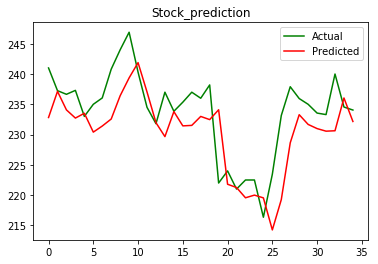

In [30]:
plt.plot(test_set,color='green',label="Actual")
plt.plot(pred,color='red',label="Predicted")
plt.title('Stock_prediction')
plt.legend()
#plt.show()
plt.savefig("newplot1.png")

In [21]:
rms = np.sqrt(np.mean(np.power((test_set-pred),2)))
rms

5.694505302705758